In [656]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [718]:
def tet_sim_lethal_inf(N,time):
    fits = np.zeros(time)
    fits[0] =1
    

    counts = np.array([int(.5*N),int(.5*N)])
    dt= 1
    picks = np.array([0,0])
    while dt<time and picks[1]==0 :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        counts -=picks
        
        fits[dt] = (picks[1]==0)*1
        
        
        dt+= 1
    return fits



def tet_sim_const_inf_m(N,time,fit_loss ):
    fits =np.zeros(time)
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =0
    counts = np.array([int(.5*N),int(.5*N)])
    dt= 1
    picks = np.array([0,0])
    thresh = .01
    fit = 0
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        #tets[dt] = picks[1]
        fit += (1- (picks[1]!=0)*fit_loss)
        #print(fit)
        
        fits[dt] =fit/dt
        
        
        dt+= 1
    return fits
    
    
def tet_sim_lin_inf_m(N,time,fit_loss ):
    fits =np.zeros(time)
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =0
    counts = np.array([int(.5*N),int(.5*N)])
    dt= 1
    picks = np.array([0,0])
    thresh = .01
    fit = 0
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        #tets[dt] = picks[1]
        fit += (1- picks[1]*fit_loss/4)
        
        fits[dt] =fit/dt
        
        
        dt+= 1
    return fits

def tet_sim_geo_inf_m(N,time,fit_loss ):
    fits =np.zeros(time)
    tets = np.zeros(time)
    fits[0]=1
    tets[0] =0
    counts = np.array([int(.5*N),int(.5*N)])
    dt= 1
    picks = np.array([0,0])
    thresh = .01
    fit = 0
    while dt<time :
        picks = np.bincount(np.random.randint(0,2,4),minlength=2)
        #counts -=picks
        #tets[dt] = picks[1]
        fit += (1- (fit_loss/2**4)*2**picks[1])
        
        fits[dt] =fit/dt
        
        
        dt+= 1
    return fits



# def tet_sim_const_inf_a(N,time,fit_loss ):
#     #fit_loss =1 - (avg_fit_loss*5-1) /5
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     fits[0]=1
#     fit_hist[0] =1
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (picks[1]!=0)*fit_loss)
#         #print(fit)
#         fit_hist[dt]= (1- (picks[1]!=0))*(fit_loss)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits, fit_hist
    
    
# def tet_sim_lin_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     fit_hist=np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- picks[1]*fit_loss/4)
#         fit_hist[dt]= (1- picks[1]*fit_loss/4)
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits

# def tet_sim_geo_inf_a(N,time,avg_fit_loss ):
#     fits =np.zeros(time)
#     tets = np.zeros(time)
#     fits[0]=1
#     tets[0] =0
#     counts = np.array([int(.5*N),int(.5*N)])
#     dt= 1
#     picks = np.array([0,0])
#     thresh = .01
#     fit = 0
#     while dt<time :
#         picks = np.bincount(np.random.randint(0,2,4),minlength=2)
#         #counts -=picks
#         #tets[dt] = picks[1]
#         fit += (1- (fit_loss/2**4)*2**picks[1])
        
#         fits[dt] =fit/dt
        
        
#         dt+= 1
#     return fits
    
    
    
    

In [719]:
time= 100
samp =5000

arr_const_min=np.zeros((samp,time))
arr_lin_min=np.zeros((samp,time))
arr_geo_min=np.zeros((samp,time))

for n in range(samp):
    arr_const_min[n] = tet_sim_const_inf_m(3,time,.5 )
    arr_lin_min[n] = tet_sim_lin_inf_m(3,time,.5 )
    arr_geo_min[n] = tet_sim_geo_inf_m(3,time,.5 )
    
    
    

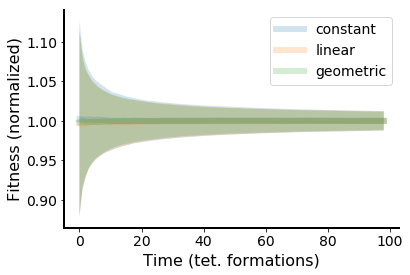

In [739]:
fig,ax=plt.subplots()
labels=['constant','linear','geometric']
for i,arr in enumerate([arr_lin_min,arr_const_min,arr_geo_min]):
    ax.plot(np.mean(arr,axis=0)[1:]/np.mean(arr,axis=0)[-1],lw=6,alpha=.2,label=labels[i])
    ax.fill_between(range(99),np.mean(arr,axis=0)[1:]/np.mean(arr,axis=0)[-1]-np.std(arr,axis=0)[1:],
                     np.std(arr,axis=0)[1:]+np.mean(arr,axis=0)[1:]/np.mean(arr,axis=0)[-1],alpha=.2)
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Fitness (normalized)',fontsize=16)
ax.legend(fontsize=14)

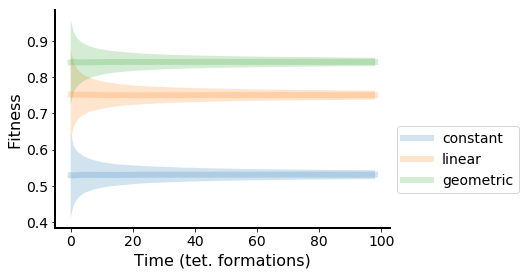

In [728]:
fig,ax=plt.subplots()
labels=['constant','linear','geometric']
for i,arr in enumerate([arr_const_min,arr_lin_min,arr_geo_min]):
    ax.plot(np.mean(arr,axis=0)[1:],lw=6,alpha=.2,label=labels[i])
    ax.fill_between(range(99),np.mean(arr,axis=0)[1:]-np.std(arr,axis=0)[1:],
                     np.std(arr,axis=0)[1:]+np.mean(arr,axis=0)[1:],alpha=.2)
for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('Time (tet. formations)',fontsize=16)
ax.set_ylabel('Fitness',fontsize=16)
ax.legend(fontsize=14,bbox_to_anchor=[1, .5])

In [462]:
time= 1000
samp =1000

arr_const_avg=np.zeros((samp,time))
arr_lin_avg=np.zeros((samp,time))
arr_geo_avg=np.zeros((samp,time))

for n in range(samp):
    arr_const_avg[n] = tet_sim_const_inf(3,time,.267 )
    arr_lin_avg[n] = tet_sim_lin_inf(3,time,.5 )
    arr_geo_avg[n] = tet_sim_geo_inf(3,time,.7904)
    
    
    

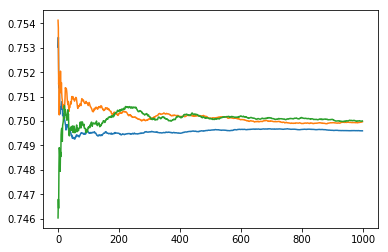

In [463]:
plt.plot(np.mean(arr_const_avg,axis=0)[1:])
plt.plot(np.mean(arr_lin_avg,axis=0)[1:])
plt.plot(np.mean(arr_geo_avg,axis=0)[1:])

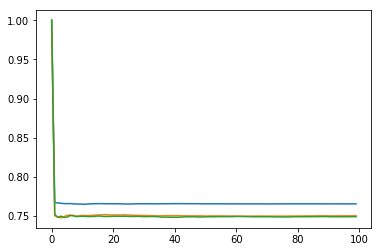

In [337]:
plt.plot(np.mean(arr_const_avg,axis=0))
plt.plot(np.mean(arr_lin_avg,axis=0))
plt.plot(np.mean(arr_geo_avg,axis=0))

In [455]:
time= 100
samp =1000


arr_const=np.zeros((samp,time))

for n in range(samp):

    arr_const[n] = tet_sim_const_inf(3,time,.267 )
    
    
    

In [456]:
np.mean(arr_const,axis=0)[-1]

0.7495378181818173

In [316]:
np.mean(2**np.array([1,2,3,4]))

7.5

In [188]:
((1 - 1*.125/1) + (1 - 3*.125)+(1-4*.125))/

0.6666666666666666

In [184]:
4*.125

0.5

In [171]:
tet_sim_lethal_inf(100,5000)

array([1., 0., 0., ..., 0., 0., 0.])

In [139]:
time = np.zeros((1000,10))
for n in range(1000):
    time[n] = tet_sim_lethal_inf(100,10)

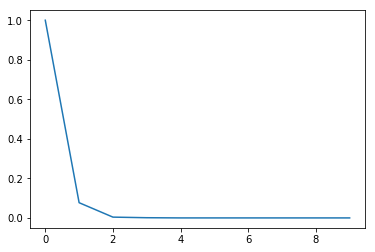

In [140]:
plt.plot(np.mean(time,axis=0))

In [115]:
np.bincount(time.astype(int),minlength=3)

array([  0, 936,  62,   2])

In [34]:
np.bincount(np.random.randint(0,2,4),minlength=2)


array([1, 3])

In [19]:
np.bincount

In [51]:
np.bincount(np.random.randint(0,2,4),minlength=2)

array([0, 4])

In [73]:
np.random.randint(0,2,4)

array([0, 1, 1, 0])

In [55]:
np.random.choice()

TypeError: choice() takes at least 1 positional argument (0 given)

In [200]:
x

0.5

In [199]:
256*2

512

In [219]:
1.5**(1/4)

1.1066819197003215

In [212]:
.84089**1

0.84089

In [218]:
(1.1066 -1)

0.10660000000000003

In [225]:
2**4

16

In [224]:
.5/.0625

8.0

In [231]:
2**4 /32

0.5